In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading in data of fighters and fight results
fighters = pd.read_csv('raw_fighter_details.csv')
fights = pd.read_csv('data.csv')

In [3]:
#Getting rid of fighters without reach data
fighters = fighters.dropna(subset=['Reach'])

In [4]:
#extracts the weight values as strings
weightstrings = fighters['Weight'].tolist()
reachstrings = fighters['Reach'].tolist()

In [5]:
#initializes an empty array to store int values of weights
weights_num = np.zeros(len(weightstrings))
reaches_num = np.zeros(len(weightstrings))

In [6]:
#Fills above arrays with int weight and reach values
for i in range(len(weights_num)):
    weights_num[i] = int(weightstrings[i][0:3])
    reaches_num[i] = int(reachstrings[i][0:2])

In [7]:
#Adds the int value of the weights to the table
fighters['Weight'] = weights_num
fighters['Reach'] = reaches_num

In [8]:
#Creates dataframes for each weight class of fighter info
flyweights = fighters.loc[(fighters['Weight'] > 116) & (fighters['Weight'] <= 126)]
bantamweights = fighters.loc[(fighters['Weight'] > 126) & (fighters['Weight'] <= 136)]
featherweights = fighters.loc[(fighters['Weight'] > 136) & (fighters['Weight'] <= 146)]
lightweights = fighters.loc[(fighters['Weight'] > 146) & (fighters['Weight'] <= 156)]
welterweights = fighters.loc[(fighters['Weight'] > 156) & (fighters['Weight'] <= 176)]
middleweights = fighters.loc[(fighters['Weight'] > 176) & (fighters['Weight'] <= 186)]
lightheavyweights = fighters.loc[(fighters['Weight'] > 186) & (fighters['Weight'] <= 206)]
heavyweights = fighters.loc[fighters['Weight'] > 206]

In [9]:
#Extracts reaches of all fighters by weight division for later processing
flw_reaches = np.array(flyweights['Reach'].to_list())
bw_reaches = np.array(bantamweights['Reach'].to_list())
fw_reaches = np.array(featherweights['Reach'].to_list())
lw_reaches = np.array(lightweights['Reach'].to_list())
ww_reaches = np.array(welterweights['Reach'].to_list())
mw_reaches = np.array(middleweights['Reach'].to_list())
lhw_reaches = np.array(lightheavyweights['Reach'].to_list())
hw_reaches = np.array(heavyweights['Reach'].to_list())

In [10]:
#A color map for later plot
cm = plt.cm.get_cmap('RdYlBu_r')

Text(0.5, 0.98, 'Distribution of Reach by Weight Class')

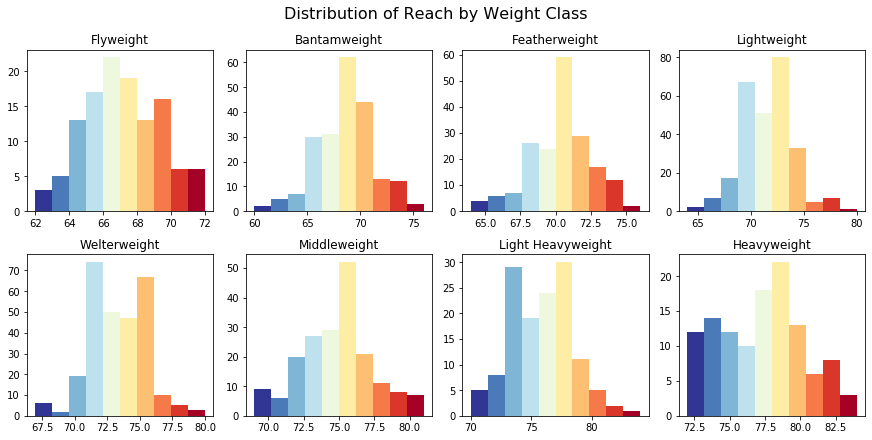

In [11]:
#This is just making pretty histograms, the same process repeated 8 times
#Reference = https://stackoverflow.com/questions/23061657/plot-histogram-with-colors-taken-from-colormap

fig1, axs1 = plt.subplots(2,4, figsize = (12,6), constrained_layout = True)

n1, bins1, patches1 = axs1[0][0].hist(flw_reaches)
axs1[0][0].set_title('Flyweight')
bin_centers1 = 0.5 * (bins1[:-1] + bins1[1:])
col1 = bin_centers1 - min(bin_centers1)
col1 /= max(col1)
for c, p in zip(col1, patches1):
    plt.setp(p, 'facecolor', cm(c))

n2, bins2, patches2 = axs1[0][1].hist(bw_reaches)
axs1[0][1].set_title('Bantamweight')
bin_centers2 = 0.5 * (bins2[:-1] + bins2[1:])
col2 = bin_centers2 - min(bin_centers2)
col2 /= max(col2)
for c, p in zip(col2, patches2):
    plt.setp(p, 'facecolor', cm(c))

n3, bins3, patches3 = axs1[0][2].hist(fw_reaches)
axs1[0][2].set_title('Featherweight')
bin_centers3 = 0.5 * (bins3[:-1] + bins3[1:])
col3 = bin_centers3 - min(bin_centers3)
col3 /= max(col3)
for c, p in zip(col3, patches3):
    plt.setp(p, 'facecolor', cm(c))

n4, bins4, patches4 = axs1[0][3].hist(lw_reaches)
axs1[0][3].set_title('Lightweight')
bin_centers4 = 0.5 * (bins4[:-1] + bins4[1:])
col4 = bin_centers4 - min(bin_centers4)
col4 /= max(col4)
for c, p in zip(col4, patches4):
    plt.setp(p, 'facecolor', cm(c))

n5, bins5, patches5 = axs1[1][0].hist(ww_reaches)
axs1[1][0].set_title('Welterweight')
bin_centers5 = 0.5 * (bins5[:-1] + bins5[1:])
col5 = bin_centers5 - min(bin_centers5)
col5 /= max(col5)
for c, p in zip(col5, patches5):
    plt.setp(p, 'facecolor', cm(c))

n6, bins6, patches6 = axs1[1][1].hist(mw_reaches)
axs1[1][1].set_title('Middleweight')
bin_centers6 = 0.5 * (bins6[:-1] + bins6[1:])
col6 = bin_centers6 - min(bin_centers6)
col6 /= max(col6)
for c, p in zip(col6, patches6):
    plt.setp(p, 'facecolor', cm(c))

n7, bins7, patches7 = axs1[1][2].hist(lhw_reaches)
axs1[1][2].set_title('Light Heavyweight')
bin_centers7 = 0.5 * (bins7[:-1] + bins7[1:])
col7 = bin_centers7 - min(bin_centers7)
col7 /= max(col7)
for c, p in zip(col7, patches7):
    plt.setp(p, 'facecolor', cm(c))

n8, bins8, patches8 = axs1[1][3].hist(hw_reaches)
axs1[1][3].set_title('Heavyweight')
bin_centers8 = 0.5 * (bins8[:-1] + bins8[1:])
col8 = bin_centers8 - min(bin_centers8)
col8 /= max(col8)
for c, p in zip(col8, patches8):
    plt.setp(p, 'facecolor', cm(c))
    
fig1.suptitle('Distribution of Reach by Weight Class', fontsize = 16)

In [12]:
#Saving the generated image
fig1.savefig('ReachProject', quality = 100)

In [13]:
#Lists of each division's champions to later extract data
flw_champs = ['Demetrious Johnson', 'Henry Cejudo']
bw_champs = ['Dominick Cruz', 'Renan Barao', 'TJ Dillashaw', 'Cody Garbrandt', 'Henry Cejudo']
fw_champs = ['Jose Aldo', 'Conor McGregor', 'Max Holloway', 'Alexander Volkanovski']
lw_champs = ['Jens Pulver', 'Sean Serk', 'BJ Penn', 'Frankie Edgar', 'Benson Henderson', 'Anthony Pettis', 
             'Rafael Dos Anjos', 'Eddie Alvarez', 'Conor McGregor', 'Tony Ferguson', 'Khabib Nurmagomedov',
             'Dustin Poirier']
ww_champs = ['Carlos Newton', 'Matt Hughes', 'BJ Penn', 'Georges St-Pierre', 'Carlos Condit', 
            'Johny Hendricks', 'Robbie Lawler', 'Tyron Woodley', 'Colby Covington', 'Kamaru Usman']
mw_champs = ['Dave Menne', 'Murilo Bustamante', 'Evan Tanner', 'Rich Franklin', 'Anderson Silva', 'Chris Weidman',
            'Luke Rockhold', 'Michael Bisping', 'Robert Whittaker', 'Georges St-Pierre', 'Israel Adesanya']
lhw_champs = ['Tito Ortiz', 'Randy Couture', 'Vitor Belfort', 'Chuck Liddell', 'Rampage Jackson', 'Forrest Griffin',
             'Rashad Evans', 'Lyoto Machida', 'Mauricio Rua', 'Jon Jones', 'Daniel Cormier']
hw_champs = ['Randy Couture', 'Josh Barnett', 'Ricco Rodriguez', 'Tim Sylvia', 'Frank Mir', 'Andrei Arlovski', 
            'Brock Lesnar', 'Shane Carwin', 'Cain Velasquez', 'Junior Dos Santos', 'Fabricio Werdum', 'Stipe Miocic']

In [14]:
#Creates dataframes of champions, organized by weight class
flw_c_df = fighters[fighters['fighter_name'].isin(flw_champs)]
bw_c_df = fighters[fighters['fighter_name'].isin(bw_champs)]
fw_c_df = fighters[fighters['fighter_name'].isin(fw_champs)]
lw_c_df = fighters[fighters['fighter_name'].isin(lw_champs)]
ww_c_df = fighters[fighters['fighter_name'].isin(ww_champs)]
mw_c_df = fighters[fighters['fighter_name'].isin(mw_champs)]
lhw_c_df = fighters[fighters['fighter_name'].isin(lhw_champs)]
hw_c_df = fighters[fighters['fighter_name'].isin(hw_champs)]

In [15]:
#for calculating percentiles
from scipy import stats

In [16]:
#Extracts reaches of champions for comparison
flw_c_reaches = np.array(flw_c_df['Reach'].tolist())
bw_c_reaches = np.array(bw_c_df['Reach'].tolist())
fw_c_reaches = np.array(fw_c_df['Reach'].tolist())
lw_c_reaches = np.array(lw_c_df['Reach'].tolist())
ww_c_reaches = np.array(ww_c_df['Reach'].tolist())
mw_c_reaches = np.array(mw_c_df['Reach'].tolist())
lhw_c_reaches = np.array(lhw_c_df['Reach'].tolist())
hw_c_reaches = np.array(hw_c_df['Reach'].tolist())

In [17]:
def percentile_array(champ_reaches, division_reach_distribution):
    """A function for generating the reach percentiles of champions given the champion list for a weight class
    and the list of all reaches in the weight class"""
    percentiles = np.zeros(len(champ_reaches))
    for i in range(len(percentiles)):
        percentiles[i] = stats.percentileofscore(division_reach_distribution,champ_reaches[i], kind = 'weak')
    return percentiles

In [18]:
#Generates the percentile lists for the champions
flw_c_reaches_p = percentile_array(flw_c_reaches,flw_reaches)
bw_c_reaches_p = percentile_array(bw_c_reaches,bw_reaches)
fw_c_reaches_p = percentile_array(fw_c_reaches,fw_reaches)
lw_c_reaches_p = percentile_array(lw_c_reaches,lw_reaches)
ww_c_reaches_p = percentile_array(ww_c_reaches,ww_reaches)
mw_c_reaches_p = percentile_array(mw_c_reaches,mw_reaches)
lhw_c_reaches_p = percentile_array(lhw_c_reaches,lhw_reaches)
hw_c_reaches_p = percentile_array(hw_c_reaches,hw_reaches)

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
#Adds the generated percentile arrays to the champion dataframes
flw_c_df['Reach Percentile Compared to Division'] = flw_c_reaches_p
bw_c_df['Reach Percentile Compared to Division'] = bw_c_reaches_p
fw_c_df['Reach Percentile Compared to Division'] = fw_c_reaches_p
lw_c_df['Reach Percentile Compared to Division'] = lw_c_reaches_p
ww_c_df['Reach Percentile Compared to Division'] = ww_c_reaches_p
mw_c_df['Reach Percentile Compared to Division'] = mw_c_reaches_p
lhw_c_df['Reach Percentile Compared to Division'] = lhw_c_reaches_p
hw_c_df['Reach Percentile Compared to Division'] = hw_c_reaches_p

In [21]:
#Dropping some irrelevant info
arrays_to_drop = ['Weight','DOB']
flw_c_df = flw_c_df.drop(arrays_to_drop, axis =1).sort_values(by = ['Reach Percentile Compared to Division'], ascending = False)
bw_c_df = bw_c_df.drop(arrays_to_drop, axis =1).sort_values(by = ['Reach Percentile Compared to Division'], ascending = False)
fw_c_df= fw_c_df.drop(arrays_to_drop, axis =1).sort_values(by = ['Reach Percentile Compared to Division'], ascending = False)
lw_c_df = lw_c_df.drop(arrays_to_drop, axis =1).sort_values(by = ['Reach Percentile Compared to Division'], ascending = False)
ww_c_df = ww_c_df.drop(arrays_to_drop, axis =1).sort_values(by = ['Reach Percentile Compared to Division'], ascending = False)
mw_c_df = mw_c_df.drop(arrays_to_drop, axis =1).sort_values(by = ['Reach Percentile Compared to Division'], ascending = False)
lhw_c_df = lhw_c_df.drop(arrays_to_drop, axis =1).sort_values(by = ['Reach Percentile Compared to Division'], ascending = False)
hw_c_df = hw_c_df.drop(arrays_to_drop, axis =1).sort_values(by = ['Reach Percentile Compared to Division'], ascending = False)

In [30]:
hw_c_df

,fighter_name,Height,Reach,Stance,Reach Percentile Compared to Division
433,Brock Lesnar,"6' 3""",81.0,Orthodox,90.677966
2895,Shane Carwin,"6' 2""",80.0,Orthodox,85.593220
2980,Stipe Miocic,"6' 4""",80.0,Orthodox,85.593220
3071,Tim Sylvia,"6' 8""",80.0,Orthodox,85.593220
1090,Frank Mir,"6' 3""",79.0,Southpaw,74.576271
1698,Josh Barnett,"6' 3""",78.0,Orthodox,67.796610
186,Andrei Arlovski,"6' 3""",77.0,Orthodox,55.932203
469,Cain Velasquez,"6' 1""",77.0,Orthodox,55.932203
1052,Fabricio Werdum,"6' 4""",77.0,Orthodox,55.932203
1760,Junior Dos Santos,"6' 4""",77.0,Orthodox,55.932203


In [39]:
division_percentiles = np.array([np.mean(flw_c_reaches_p),np.mean(bw_c_reaches_p),np.mean(fw_c_reaches_p),
                                np.mean(lw_c_reaches_p),np.mean(ww_c_reaches_p),np.mean(mw_c_reaches_p),
                                np.mean(lhw_c_reaches_p),np.mean(hw_c_reaches_p)])
weights = np.array([125,135,145,155,170,185,205,235])

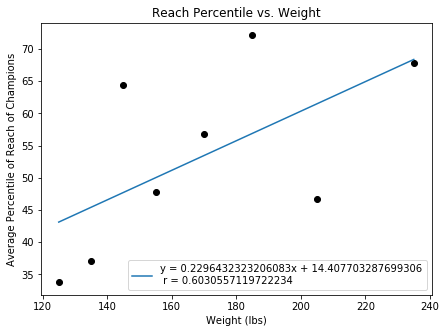

In [56]:
fig2, ax2 = plt.subplots(figsize = (7,5))
ax2.scatter(weights,division_percentiles,c = 'black')
slope, intercept, r_value, p_value, std_err = stats.linregress(weights,division_percentiles)
xarray = np.linspace(125,235,1000)
yarray = (slope*xarray)+intercept
ax2.plot(xarray,yarray,label = 'y = ' +str(slope)+'x + '+str(intercept)+'\n r = '+str(r_value))
ax2.set_xlabel('Weight (lbs)')
ax2.set_ylabel('Average Percentile of Reach of Champions')
ax2.set_title('Reach Percentile vs. Weight')
ax2.legend()

In [58]:
fig2.savefig('ReachProject', quality = 100)

In [26]:
#Keeping relevant fight data
fights = fights[['R_fighter', 'B_fighter', 'Winner', 'title_bout']]

In [27]:
fights

,R_fighter,B_fighter,Winner,title_bout
0,Henry Cejudo,Marlon Moraes,Red,True
1,Valentina Shevchenko,Jessica Eye,Red,True
2,Tony Ferguson,Donald Cerrone,Red,False
3,Jimmie Rivera,Petr Yan,Blue,False
4,Tai Tuivasa,Blagoy Ivanov,Blue,False
...,...,...,...,...
5139,Gerard Gordeau,Kevin Rosier,Red,False
5140,Ken Shamrock,Patrick Smith,Red,False
5141,Royce Gracie,Art Jimmerson,Red,False
5142,Kevin Rosier,Zane Frazier,Red,False


In [28]:
#Generating a list of fighters with available reach data
fighters_with_reach_data = fighters['fighter_name'].tolist()

In [29]:
#Keeping fights only where reach data for both fighters was available
reach_filtered_fights = fights.loc[(fights['R_fighter'].isin(fighters_with_reach_data)) & 
                                   fights['B_fighter'].isin(fighters_with_reach_data)]

In [30]:
reach_filtered_fights

,R_fighter,B_fighter,Winner,title_bout
0,Henry Cejudo,Marlon Moraes,Red,True
1,Valentina Shevchenko,Jessica Eye,Red,True
2,Tony Ferguson,Donald Cerrone,Red,False
3,Jimmie Rivera,Petr Yan,Blue,False
4,Tai Tuivasa,Blagoy Ivanov,Blue,False
...,...,...,...,...
4901,Chuck Liddell,Jeff Monson,Red,False
4923,Tito Ortiz,Wanderlei Silva,Red,True
4967,Jeremy Horn,Chuck Liddell,Red,False
4980,Vitor Belfort,Wanderlei Silva,Red,False


In [31]:
#Copying the above dataframe
reach_filtered_fights2 = reach_filtered_fights

In [33]:
#generating lists of red and blue fighters
r_fighters = reach_filtered_fights2['R_fighter'].tolist()
b_fighters = reach_filtered_fights2['B_fighter'].tolist()

In [34]:
#Initializing arrays to extract reaches of fighters by color
r_reach = np.zeros(len(r_fighters))
b_reach = np.zeros(len(b_fighters))

In [35]:
#Filling the above arrays with relevant reaches
for i in range(len(r_reach)):
    r_reach[i] = fighters.loc[fighters['fighter_name'] == r_fighters[i]].iloc[0]['Reach']
    b_reach[i] = fighters.loc[fighters['fighter_name'] == b_fighters[i]].iloc[0]['Reach']

In [36]:
#Adding the above arrays as columns
reach_filtered_fights2['Red Reach'] = r_reach
reach_filtered_fights2['Blue Reach'] = b_reach

In [38]:
#Generating a dataframe of fights where the fighter with a reach advantage won
reach_filtered_fights2.loc[((reach_filtered_fights2['Red Reach'] > reach_filtered_fights2['Blue Reach']) & 
                            (reach_filtered_fights2['Winner']=='Red')) | 
                           ((reach_filtered_fights2['Red Reach'] < reach_filtered_fights2['Blue Reach']) & 
                            (reach_filtered_fights2['Winner']=='Blue'))]

,R_fighter,B_fighter,Winner,title_bout,Red Reach,Blue Reach
2,Tony Ferguson,Donald Cerrone,Red,False,76.0,73.0
5,Tatiana Suarez,Nina Ansaroff,Red,False,66.0,64.0
6,Aljamain Sterling,Pedro Munhoz,Red,False,71.0,65.0
7,Karolina Kowalkiewicz,Alexa Grasso,Blue,False,64.0,66.0
8,Ricardo Lamas,Calvin Kattar,Blue,False,71.0,72.0
...,...,...,...,...,...,...
4839,Josh Barnett,Randy Couture,Red,True,78.0,75.0
4861,Matt Lindland,Phil Baroni,Red,False,74.0,72.0
4890,Elvis Sinosic,Jeremy Horn,Red,False,77.0,74.0
4901,Chuck Liddell,Jeff Monson,Red,False,76.0,74.0


In [112]:
1979/4403

0.44946627299568476

In [41]:
#Extracting the above statistic for only title bouts
reach_filtered_fights3 = reach_filtered_fights2.loc[reach_filtered_fights2['title_bout']]
reach_filtered_fights3

,R_fighter,B_fighter,Winner,title_bout,Red Reach,Blue Reach
0,Henry Cejudo,Marlon Moraes,Red,True,64.0,67.0
1,Valentina Shevchenko,Jessica Eye,Red,True,66.0,66.0
38,Rose Namajunas,Jessica Andrade,Blue,True,65.0,62.0
86,Max Holloway,Dustin Poirier,Blue,True,69.0,72.0
87,Kelvin Gastelum,Israel Adesanya,Blue,True,71.0,80.0
...,...,...,...,...,...,...
4864,Jens Pulver,Dennis Hallman,Red,True,70.0,72.0
4871,Tito Ortiz,Elvis Sinosic,Red,True,74.0,77.0
4887,Tito Ortiz,Evan Tanner,Red,True,74.0,74.0
4888,Jens Pulver,Caol Uno,Red,True,70.0,70.0


In [42]:
reach_filtered_fights3.loc[((reach_filtered_fights2['Red Reach'] > reach_filtered_fights2['Blue Reach']) & 
                            (reach_filtered_fights2['Winner']=='Red')) | 
                           ((reach_filtered_fights2['Red Reach'] < reach_filtered_fights2['Blue Reach']) & 
                            (reach_filtered_fights2['Winner']=='Blue'))]

,R_fighter,B_fighter,Winner,title_bout,Red Reach,Blue Reach
86,Max Holloway,Dustin Poirier,Blue,True,69.0,72.0
87,Kelvin Gastelum,Israel Adesanya,Blue,True,71.0,80.0
149,Jon Jones,Anthony Smith,Red,True,84.0,76.0
150,Tyron Woodley,Kamaru Usman,Blue,True,74.0,76.0
223,Jon Jones,Alexander Gustafsson,Red,True,84.0,79.0
...,...,...,...,...,...,...
4761,Matt Hughes,Frank Trigg,Red,True,73.0,71.0
4769,Randy Couture,Tito Ortiz,Red,True,75.0,74.0
4786,Matt Hughes,Sean Sherk,Red,True,73.0,67.0
4802,Tito Ortiz,Ken Shamrock,Red,True,74.0,72.0


In [43]:
139/276

0.5036231884057971